# Intel Image classification - MLP


Multiclass image scene classification using multilayer perceptron architecture

**Dataset**: [Intel Image Classification](https://www.kaggle.com/puneet6060/intel-image-classification)




## Imports

In [0]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow import keras

In [0]:
drive.mount('/content/drive')

In [0]:
!unzip -q '/content/drive/My Drive/intel-image-classification.zip'

In [0]:
class_names = ['building', 'forest', 'glacier', 'mountain', 'sea', 'street']

## Preparing the data

Function `load_image_data()` receives path and traverses the dir tree using `os.scandir()`. Each image is resized to 150 x 150, converted to grayscale and assigned a label, which is subdirectory name. Array elements of images and labels are bound with `zip()` and then randomly shuffled.

In [0]:
train_path = '/content/seg_train/seg_train'
test_path = '/content/seg_test/seg_test'

In [0]:
def load_image_data(path):
    Images = []
    Labels = []
    label = 0

    for entry in os.scandir(path):
        if entry.is_dir():
            if entry.name == 'buildings':
                label = 0
            elif entry.name == 'forest':
                label = 1
            elif entry.name == 'glacier':
                label = 2
            elif entry.name == 'mountain':
                label = 3
            elif entry.name == 'sea':
                label = 4
            elif entry.name == 'street':
                label = 5

        for img_entry in os.scandir(path + r'/' + entry.name):
            image = cv2.imread(path + r'/' + entry.name + r'/' + img_entry.name)
            image = cv2.resize(image, (150,150))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            Images.append(image)
            Labels.append(label)
    
    zipped = list(zip(Images, Labels))
    random.shuffle(zipped)
    Images, Labels = zip(*zipped)
        
    return Images, Labels

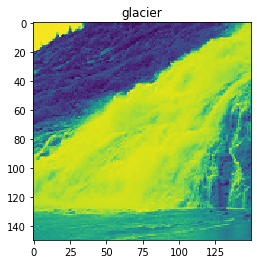

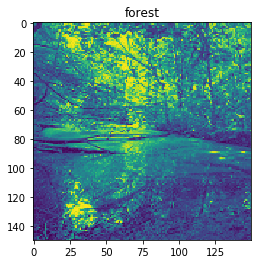

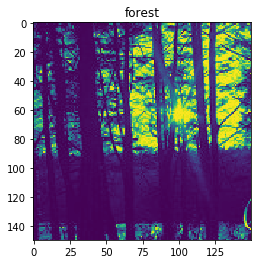

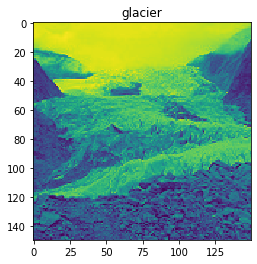

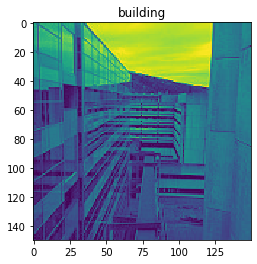

In [0]:
train_images, train_labels = load_image_data(train_path)
test_images, test_labels = load_image_data(test_path)

for i in range(5):
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.title("{}".format(class_names[train_labels[i]]))
    plt.show()

Train/test images/labels are converted into numpy array and divided by 255.0. Each pixel is represented by a value between 0 and 255, which determines its intensity. By division with 255.0 dataset is "shrunk", i. e. scaled because of easier computation.

In [0]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [0]:
train_images = train_images/255.0
test_images = test_images/255.0

## MLP Model

This model consists of stack of Keras Dense and Dropout layers.

**Dense layer** - implements the basic nn operation `output = activation(dot(input, kernel) + bias)`, where `activation` is activation function (ReLU in this case), `kernel` is a weights matrix created by the layer and `bias` is a bias vector created by the layer.

**Dropout layer** - randomly selects nodes to be dropped out with given probability, is used as a method to minimize overfitting

In [0]:
mlp = keras.Sequential([
    keras.layers.Flatten(input_shape = (150, 150)),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(5625, activation = 'relu'),
    keras.layers.Dense(1406, activation = 'relu'),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(350, activation = 'relu'),
    keras.layers.Dense(88, activation = 'relu'),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(6, activation = 'softmax')
])

In [0]:
adam = keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
mlp.compile(optimizer = adam, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [0]:
mlp.fit(train_images, train_labels, batch_size = 64, epochs = 20)

Train on 14034 samples
Epoch 1/20
14034/14034 [==============================] - 6s 424us/sample - loss: 1.7470 - acc: 0.2689
Epoch 2/20
14034/14034 [==============================] - 6s 417us/sample - loss: 1.6412 - acc: 0.3178
Epoch 3/20
14034/14034 [==============================] - 6s 410us/sample - loss: 1.5934 - acc: 0.3410
Epoch 4/20
14034/14034 [==============================] - 6s 413us/sample - loss: 1.5588 - acc: 0.3570
Epoch 5/20
14034/14034 [==============================] - 6s 411us/sample - loss: 1.5387 - acc: 0.3714
Epoch 6/20
14034/14034 [==============================] - 6s 408us/sample - loss: 1.5187 - acc: 0.3784
Epoch 7/20
14034/14034 [==============================] - 6s 410us/sample - loss: 1.4982 - acc: 0.3910
Epoch 8/20
14034/14034 [==============================] - 6s 410us/sample - loss: 1.4787 - acc: 0.3987
Epoch 9/20
14034/14034 [==============================] - 6s 406us/sample - loss: 1.4546 - acc: 0.4096
Epoch 10/20
14034/14034 [=========================

In [0]:
test_loss, test_accuracy = mlp.evaluate(test_images, test_labels)

print("Test accuracy: {}".format(test_accuracy))

3000/3000 [==============================] - 1s 300us/sample - loss: 1.3797 - acc: 0.4610
Test accuracy: 0.460999995470047


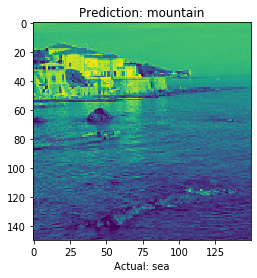

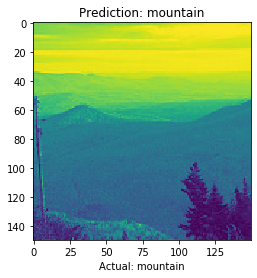

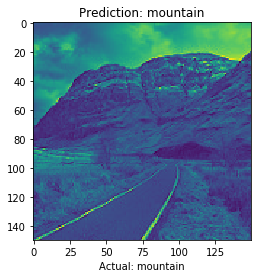

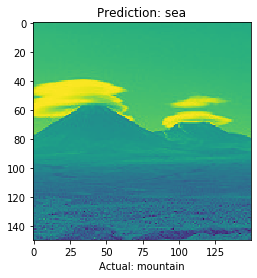

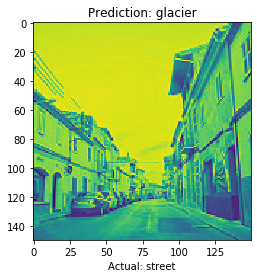

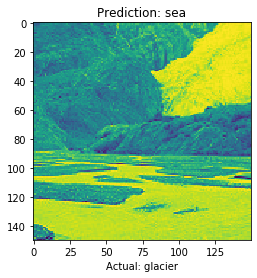

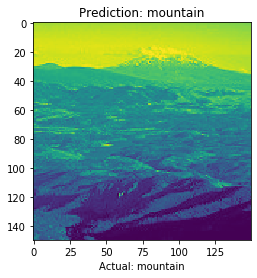

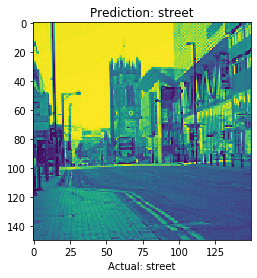

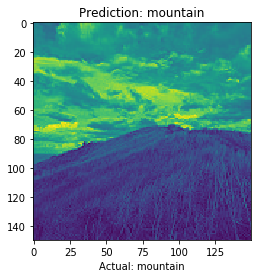

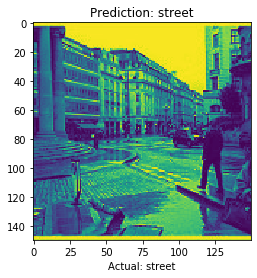

In [0]:
prediction = mlp.predict(test_images)

for i in range(10):
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel("Actual: {}".format(class_names[test_labels[i]]))
    plt.title("Prediction: {}".format(class_names[np.argmax(prediction[i])]))
    plt.show()